In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

Saving IMDb_movies.csv to IMDb_movies.csv
Saving IMDb_names.csv to IMDb_names.csv
Saving IMDb_ratings.csv to IMDb_ratings.csv
Saving IMDb_title_principals.csv to IMDb_title_principals.csv


In [ ]:
def clean_currency_column(column):
    if column.dtype == object:
        return pd.to_numeric(column.str.replace('[$\,]', '', regex=True), errors='coerce')
    return column

In [ ]:
# def clean_currency_column(column):
#     if column.dtype == object:
#         return pd.to_numeric(column.str.replace('[\$\,]', '', regex=True), errors='coerce')
#     return column
movies_df = pd.read_csv('IMDb_movies.csv')
ratings_df = pd.read_csv('IMDb_ratings.csv')
movies_df['budget'] = clean_currency_column(movies_df['budget'])
movies_df['worlwide_gross_income'] = clean_currency_column(movies_df['worlwide_gross_income'])
names_df = pd.read_csv('IMDb_names.csv')
title_principals_df = pd.read_csv('IMDb_title_principals.csv')
combined_df = movies_df.merge(ratings_df, on='imdb_title_id', how='inner')
combined_df = combined_df.merge(title_principals_df, on='imdb_title_id', how='left')
combined_df = combined_df.merge(names_df, left_on='imdb_name_id', right_on='imdb_name_id', how='left')

<ipython-input-7-3537429e8f9f>:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv('IMDb_movies.csv')


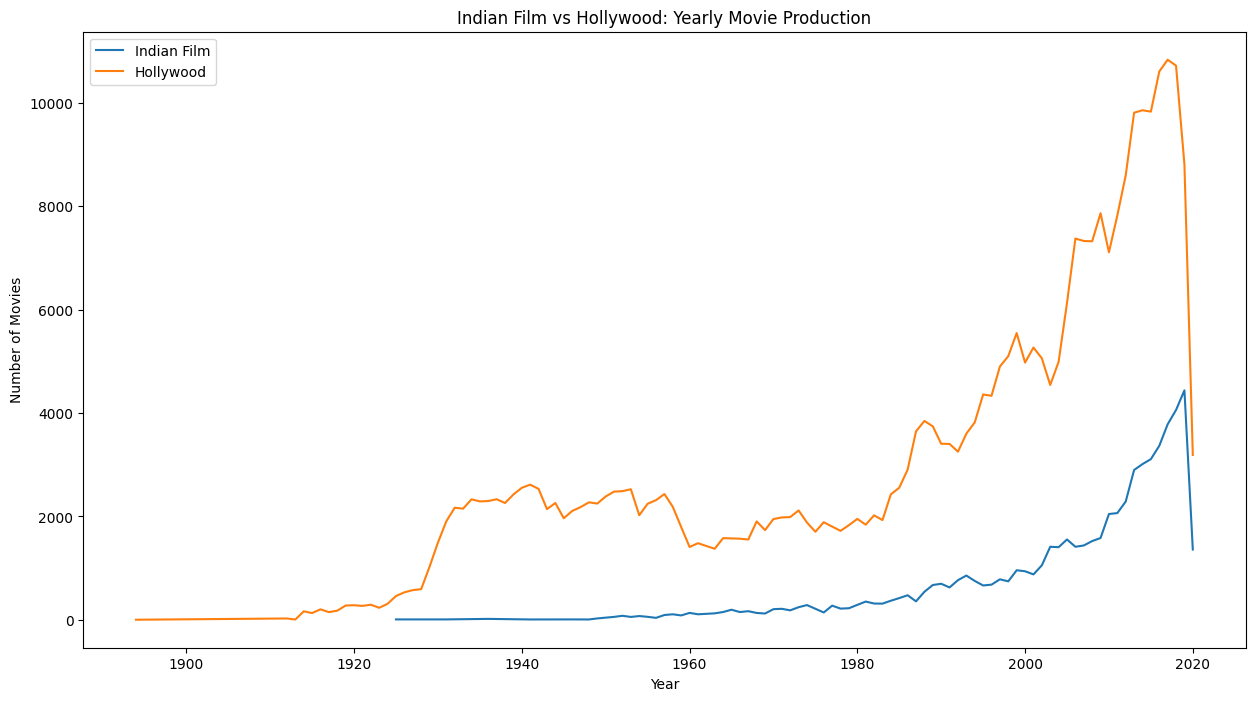

In [ ]:

# Convert 'year' column to numeric, setting errors to 'coerce' will convert non-numeric values to NaN
combined_df['year'] = pd.to_numeric(combined_df['year'], errors='coerce')

# Then, you can drop rows where 'year' is NaN if needed
combined_df.dropna(subset=['year'], inplace=True)

# Filter for India (encompases Bollywood, Tollywood, Pollywood, etc) and Hollywood movies
india_df = combined_df[combined_df['country'].str.contains('India', na = False)]
hollywood_df = combined_df[combined_df['country'].str.contains('USA', na = False)]

# Group by year and count movies
india_df_yearly = india_df.groupby('year').size()
hollywood_yearly = hollywood_df.groupby('year').size()

# Plotting
plt.figure(figsize=(15, 8))
sns.lineplot(data=india_df_yearly, label='Indian Film')
sns.lineplot(data=hollywood_yearly, label='Hollywood')
plt.title('Indian Film vs Hollywood: Yearly Movie Production')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend()
plt.show()

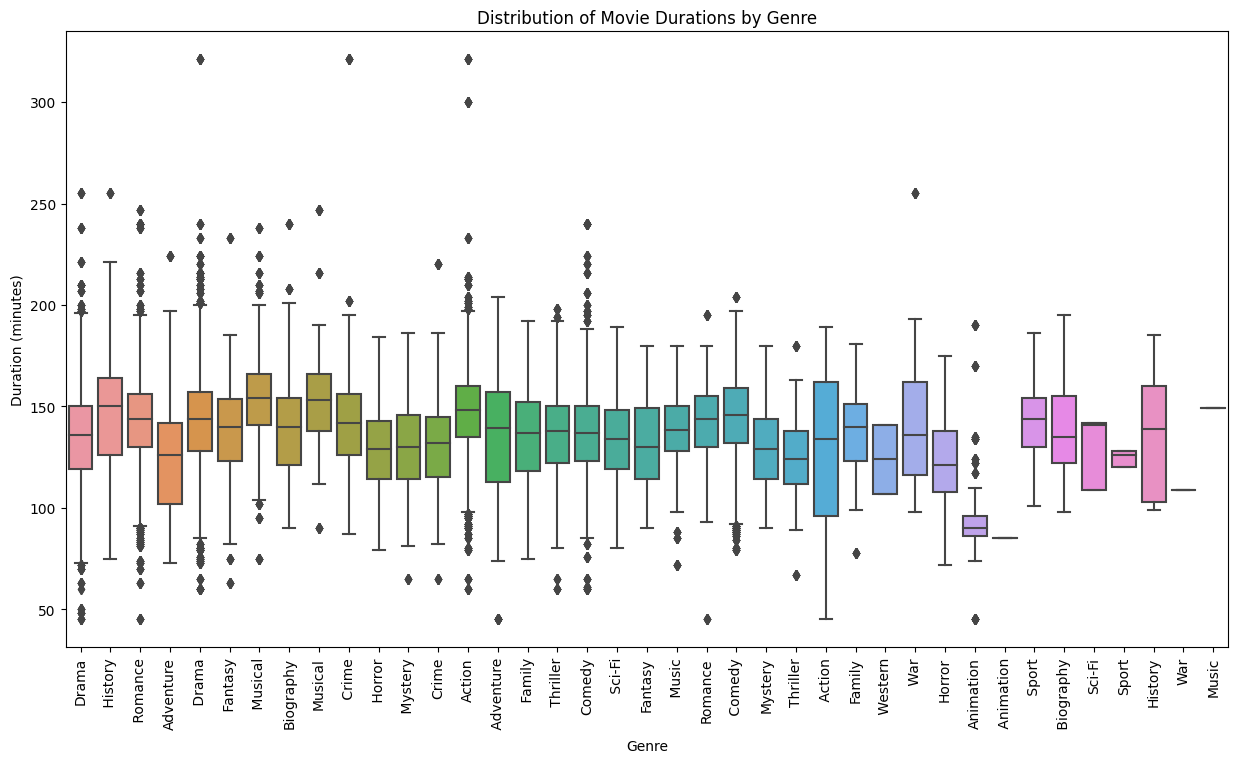

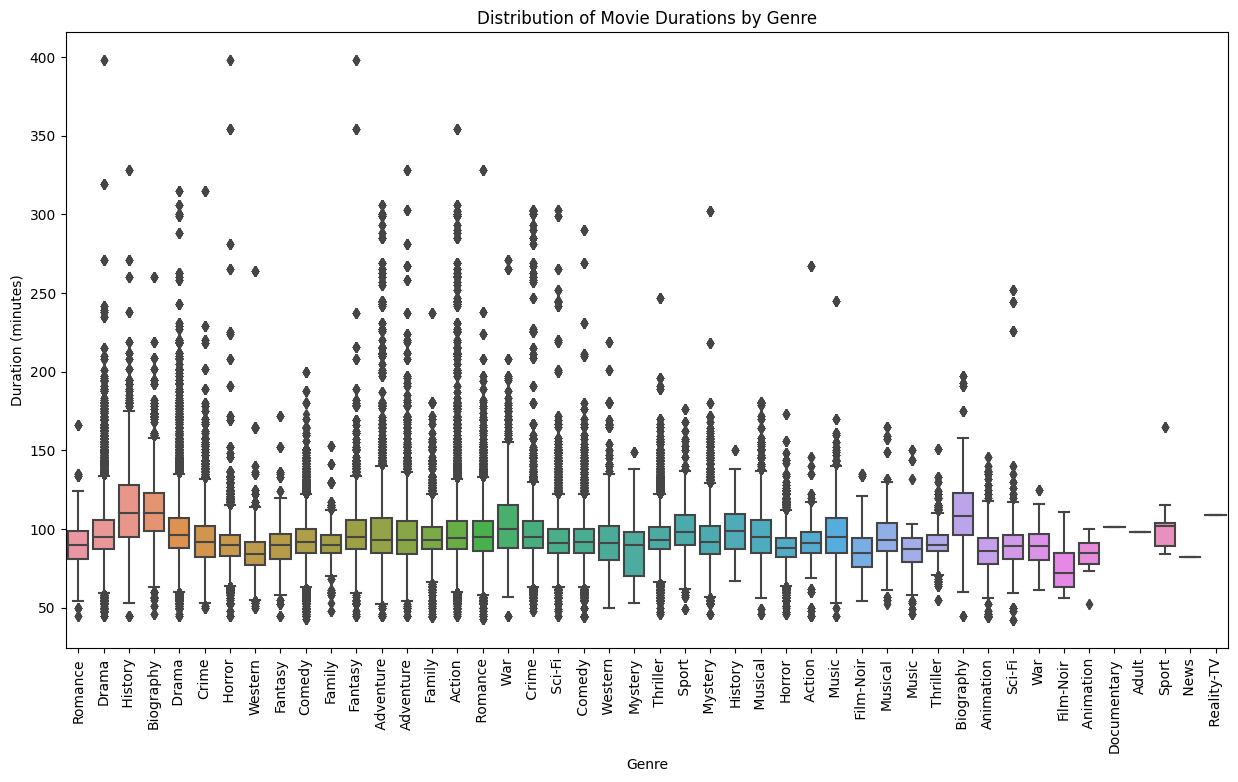

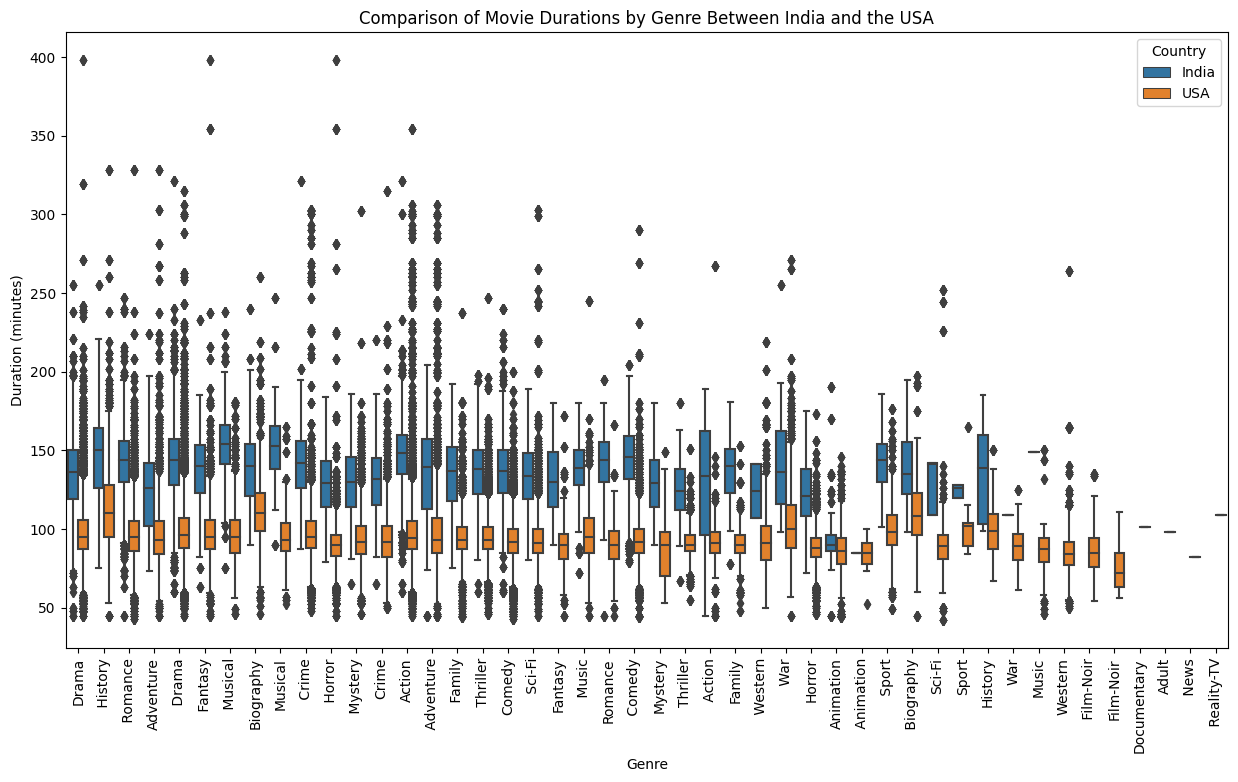

In [ ]:
# Explode the 'genres' column
india_df_exploded = india_df.assign(genres=india_df['genre'].str.split(',')).explode('genres')
usa_df_exploded = hollywood_df.assign(genres=hollywood_df['genre'].str.split(',')).explode('genres')

# Select the 'duration' and 'genres' columns
duration_genre_df_ind = india_df_exploded[['duration', 'genres']]
duration_genre_df_us = usa_df_exploded[['duration', 'genres']]

# # Plot for India
# plt.figure(figsize=(15, 8))
# sns.boxplot(x='genres', y='duration', data=duration_genre_df_ind)
# plt.title('Distribution of Movie Durations by Genre')
# plt.xlabel('Genre')
# plt.ylabel('Duration (minutes)')
# plt.xticks(rotation=90)
# plt.show()

# # Plot for USA
# plt.figure(figsize=(15, 8))
# sns.boxplot(x='genres', y='duration', data=duration_genre_df_us)
# plt.title('Distribution of Movie Durations by Genre')
# plt.xlabel('Genre')
# plt.ylabel('Duration (minutes)')
# plt.xticks(rotation=90)
# plt.show()

duration_genre_df_combined = pd.concat([duration_genre_df_ind.assign(country='India'),
                                         duration_genre_df_us.assign(country='USA')])

# Create an overlapped boxplot with hue
plt.figure(figsize=(15, 8))
sns.boxplot(x='genres', y='duration', hue='country', data=duration_genre_df_combined)
plt.title('Comparison of Movie Durations by Genre Between India and the USA')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=90)
plt.legend(title='Country')
plt.show()

<ipython-input-15-6134f8fd7ab1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_df['decade'] = ((india_df['year'] // 10) * 10).astype(int)


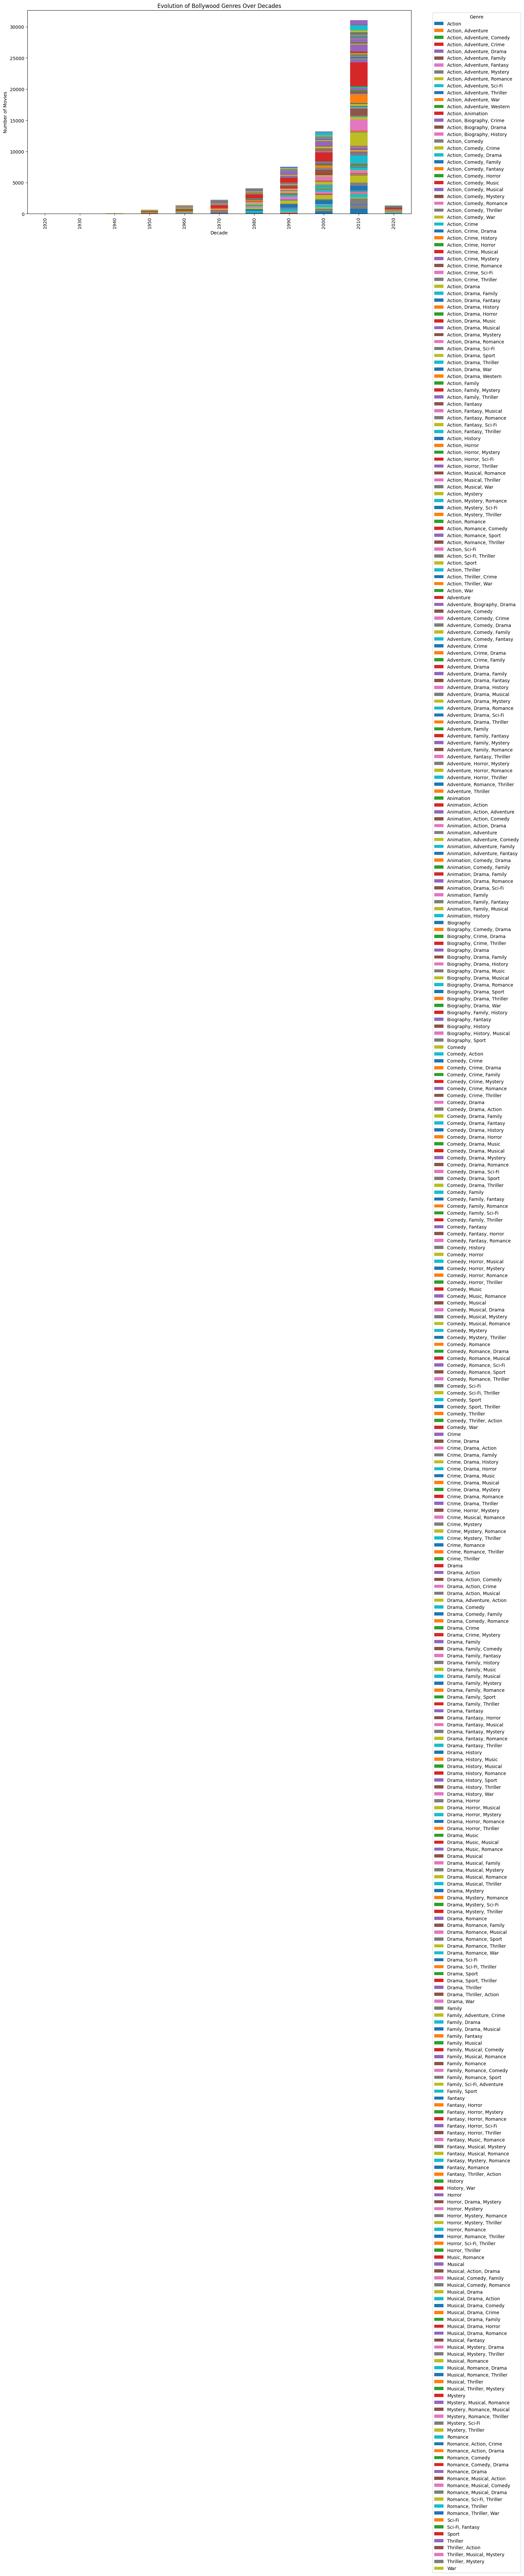

In [ ]:
# Filter for Indian movies
india_df = combined_df[combined_df['country'].str.contains('India', na=False)]
india_df['decade'] = ((india_df['year'] // 10) * 10).astype(int)

#print(bollywood_df)

india_df = india_df.explode('genre')

# Grouping by decade and genre
decade_genre_counts = india_df.groupby(['decade', 'genre']).size().unstack(fill_value=0)

# Plotting
decade_genre_counts.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Evolution of Bollywood Genres Over Decades')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


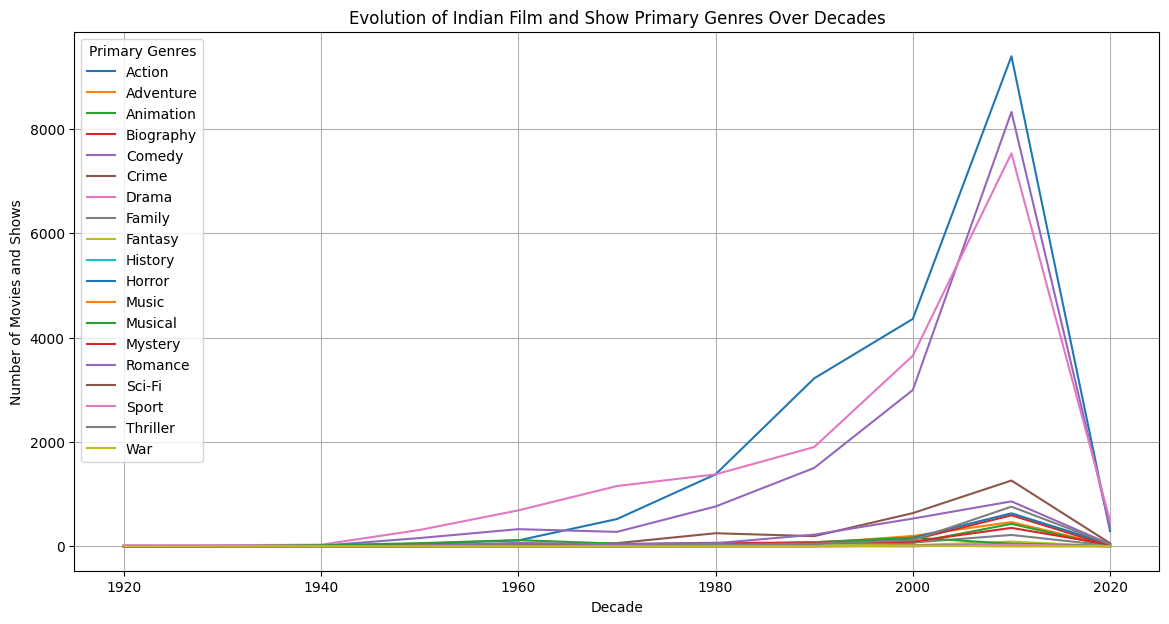

In [ ]:
india_df['primary_genre'] = india_df['genre'].str.split(',').str[0]
decade_genre_df = india_df.groupby(['decade', 'primary_genre']).size().unstack(fill_value=0)
decade_genre_df.plot(kind='line', figsize=(14, 7))
plt.title('Evolution of Indian Film and Show Primary Genres Over Decades')
plt.xlabel('Decade')
plt.ylabel('Number of Movies and Shows')
plt.legend(title='Primary Genres')
plt.grid(True)
plt.show()

# ... previous code for loading data and creating bollywood_df ...


<Figure size 1200x800 with 0 Axes>

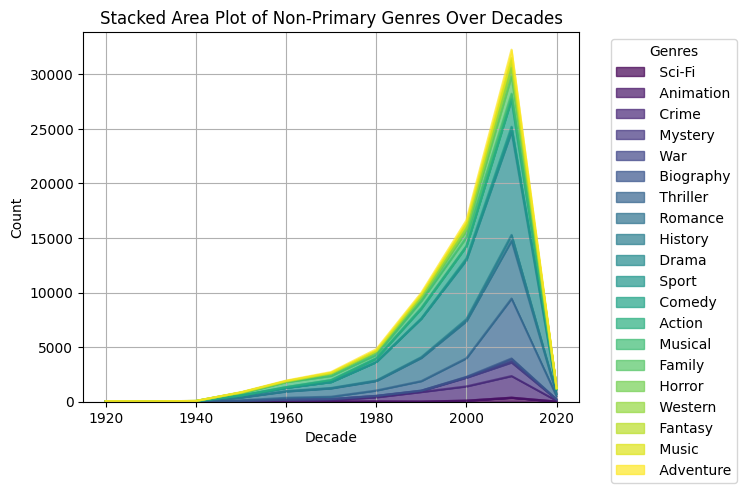

In [ ]:
# # Assuming secondary, tertiary, ... , n-iary genres have been extracted to their own columns
# ax = decade_genre_df.plot(kind='line', figsize=(14, 7), color=colors[:decade_genre_df.shape[1]])
# secondary_genre_df.plot(kind='line', figsize=(14, 7), color=colors[:secondary_genre_df.shape[1]], linestyle='--', ax=ax)
# tertiary_genre_df.plot(kind='line', figsize=(14, 7), color=colors[:tertiary_genre_df.shape[1]], linestyle=':', ax=ax)

# plt.title('Evolution of Indian Genres Over Decades')
# plt.xlabel('Decade')
# plt.ylabel('Number of Movies')
# plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
# plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the 'india_df' DataFrame
# Extract primary genre
india_df['primary_genre'] = india_df['genre'].str.split(',').str[0]

# Extract all non-primary genres into a list
non_primary_genres = []
for genres in india_df['genre'].str.split(','):
    non_primary_genres.extend(genres[1:])  # Start from the second genre

# Remove duplicates and create a list of unique non-primary genres
non_primary_genres_set = list(set(non_primary_genres))

# Create a new DataFrame to store counts by decade for each non-primary genre
decade_non_primary_genre_df = pd.DataFrame(index=india_df['decade'].unique(), columns=non_primary_genres_set)
decade_non_primary_genre_df = decade_non_primary_genre_df.fillna(0)

# Count non-primary genres by decade
for index, row in india_df.iterrows():
    decade = row['decade']
    genres = row['genre'].split(',')
    for genre in genres[1:]:  # Start from the second genre
        decade_non_primary_genre_df.at[decade, genre] += 1

# Create a stacked area plot
plt.figure(figsize=(12, 8))
decade_non_primary_genre_df.plot(kind='area', stacked=True, colormap='viridis', alpha=0.7)
plt.title('Stacked Area Plot of Non-Primary Genres Over Decades')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()





In [ ]:

# Joining with title_principals and names data

# Check the column names in 'names_df'
print(names_df.columns)
print(title_principals_df.columns)
india_actors_df = india_df.merge(title_principals_df, on='imdb_title_id')
india_actors_df = india_actors_df.merge(names_df, left_on='imdb_name_id', right_on='imdb_name_id')

# Filtering for actors
actor_counts = india_actors_df[india_actors_df['category'] == 'actor']['name'].value_counts().head(20)

# Plotting
actor_counts.plot(kind='bar', figsize=(15, 8))
plt.title('Top Indian Actors Based on Number of Movies+Shows')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()


Index(['imdb_name_id', 'name', 'birth_name', 'height', 'bio', 'birth_details',
       'date_of_birth', 'place_of_birth', 'death_details', 'date_of_death',
       'place_of_death', 'reason_of_death', 'spouses_string', 'spouses',
       'divorces', 'spouses_with_children', 'children'],
      dtype='object')
Index(['imdb_title_id', 'ordering', 'imdb_name_id', 'category', 'job',
       'characters'],
      dtype='object')


KeyError: ignored

In [ ]:
# Filter for Bollywood movies with budget and gross income data

# bollywood_df['budget'] = clean_currency_column(bollywood_df['budget'])
# bollywood_df['worlwide_gross_income'] = clean_currency_column(bollywood_df['worlwide_gross_income'])

india_financials_df = india_df.dropna(subset=['budget', 'worlwide_gross_income'])

# Plotting
sns.scatterplot(data=india_financials_df, x='budget', y='worlwide_gross_income')
plt.title('Bollywood Movies: Budget vs. Worldwide Gross Income')
plt.xlabel('Budget (in USD)')
plt.ylabel('Worldwide Gross Income (in USD)')
plt.show()
